# Learning markets for e-Learning

This project is associated with an e-learning company offering courses on programming. Most courses are on web and mobile development, but also looking to cover other areas, such as data science, game development etc. To promote the products, the company is looking to invest in advertising, and the goal of this project is to find the two best markets to focus these efforts. 

We will use existing survey data created by **freeCodeCamp**, a free e-learning platform that offers courses on web development. The survey asks over 30,000 new coders how they are learning to code, with more than 50 questions. 

The data is publicly available at [this GitHub repository)](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(survey.shape[0], 'rows in the dataset')

18175 rows in the dataset


## Sample representability?

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [4]:
top_roles = survey['JobRoleInterest'].value_counts(normalize=True)*100
top_roles

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

We see here that many people are interested in web development roles, including full stack, front-end, and back-end. There are also a few interested in mobile and game development, and some interest in data science. 

There are also a large number of people who listed multiple roles, indicating they are not exactly sure of the area to go into. We will split these answers up to find all respondents who expressed some interest in at least one of the areas of focus; web and mobile development. 

In [5]:
# splitting the role interests
role_interests = survey['JobRoleInterest'].dropna()
split_interests = role_interests.str.split(',')

# Frequency table describing the number roles interested in per user
options = split_interests.apply(lambda x: len(x))
options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

From this we see that only 31.7% of users have a specific role in mind, whilst many have between 2 and 5 options. This is still representative of new coders as it is common for beginners to have a wide range of interests before settling into a specialisation. 

In [7]:
# creating frequency table for roles in web or mobile development
web_mobile = role_interests.str.contains('Web Developer|Mobile Developer')
freq = web_mobile.value_counts(normalize = True) * 100
freq

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

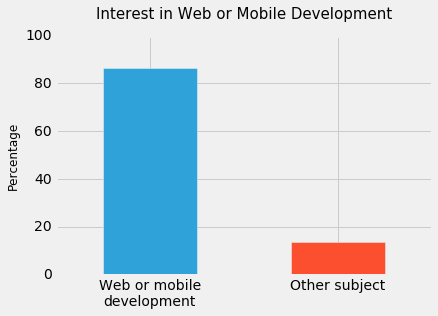

In [26]:
freq.plot.bar()
plt.title('Interest in Web or Mobile Development', y=1.05, fontsize=15)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'], rotation = 0)
plt.ylim([0,100])
plt.ylabel('Percentage', fontsize=12)
plt.show()

After splitting the **JobRoleInterest** column data, we find that 86.2% of respondents have some interest in either web or mobile development. As this matches our user base and subjects of interest, we can continue with this dataset as a reprsentable sample. 

We can now move on to our actual analysis, where we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

## New coders - locations and densities

We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location. 

There are two columns relating to country information:

1. **CountryCitizen** - country of origin
2. **CountryLive** - country of residence

For our analysis, we'll work with the CountryLive variable because we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. One indicator of a good market is the number of potential customers

In [50]:
survey_with_interest = survey[pd.notnull(survey['JobRoleInterest'])].copy()

# frequency tables with absolute and relative frequencies
absolute_frequencies = survey_with_interest['CountryLive'].value_counts()
relative_frequencies = survey_with_interest['CountryLive'].value_counts(normalize = True) * 100

# displayying frequency tables in dataframe
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies}
            )

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


From this data, US is by far the largest market with 45.7 of the respondents. This is followed by India with 7.7%, and UK. It is difficult to select new markets from only this data, as it is possible that we have a higher American repsonse due to the survey being conducted by a primarily US based company. Also, the potential markets will depend on how much each user is willing to spend. Therefore, we will require further analysis. 

## Spending money for learning

The **MoneyForLearning** column describes in USD the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

1. These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
2. Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [63]:
survey_with_interest['MonthsProgramming'].replace(0, 1, inplace=True)
survey_with_interest['SpendPerMonth'] = (survey_with_interest['MoneyForLearning'] / survey_with_interest['MonthsProgramming'])
print(survey_with_interest['SpendPerMonth'].isna().sum(), 'null SpendPerMonth Values')
print(survey_with_interest['CountryLive'].isna().sum(), 'null CountryLive Values')

675 null SpendPerMonth Values
154 null CountryLive Values


With 675 null values for the new **SpendPerMonth** column, and 154 for **CountryLive**, we will drop these rows. 

In [64]:
survey_nonull = survey_with_interest[pd.notnull(survey_with_interest['SpendPerMonth']) 
                                     & pd.notnull(survey_with_interest['CountryLive'])].copy()

In [71]:
# isolating average spend per month for the four countries of interest
cols = ['United States of America', 'India', 'United Kingdom', 'Canada']
survey_nonull.groupby('CountryLive').mean()['SpendPerMonth'][cols]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: SpendPerMonth, dtype: float64

The main result that stands out here is the average spend in India, as it is still a developing country so we would expect the monthly investment to be much lower, especially considering the purchasing power of the INR and relative incomes. 

It is possible that this data proves India to be a potentially lucrative market, however we should be wary of outliers skewing either the India data higher, or the US, UK, and Canada data lower. 

## Dealing with extreme outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


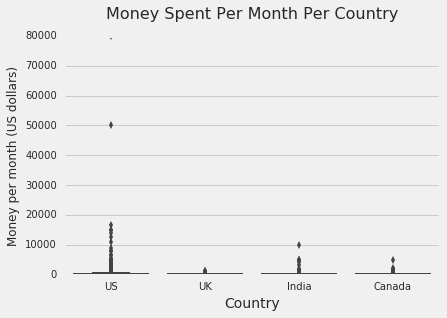

In [81]:
only_4 = survey_nonull[survey_nonull['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(y='SpendPerMonth', x='CountryLive', data=only_4)
plt.title('Money Spent Per Month Per Country', fontsize=16, y=1.05)
plt.ylabel('Money per month (US dollars)', fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

Immediately we can see some respondents in US spending over \$50k per month which seems quite unlikely. Therefore we will remove any spends over \$20k.

In [83]:
survey_nonull = survey_nonull[survey_nonull['SpendPerMonth'] < 20000]
survey_nonull.groupby('CountryLive').mean()['SpendPerMonth'][cols]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: SpendPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


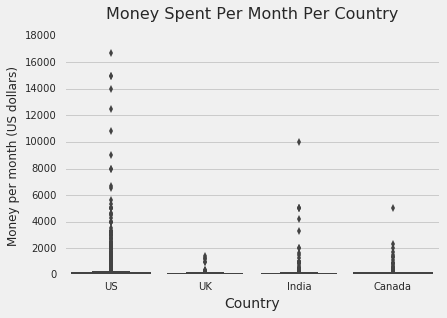

In [84]:
only_4 = survey_nonull[survey_nonull['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(y='SpendPerMonth', x='CountryLive', data=only_4)
plt.title('Money Spent Per Month Per Country', fontsize=16, y=1.05)
plt.ylabel('Money per month (US dollars)', fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

We can also see some extreme data points for India, which could very well be legitimate. We will look more closely at these.

In [96]:
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['SpendPerMonth'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpendPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


These 6 respondents have spent over \$2.5k per month which could have been used on bootcamps. However, when looking more closely, none of these users have attended any bootcamps, and therefore may have entered money spent including university tuition fees. As the survey was asking for information outside of degree courses, we will drop these rows and continue. 

In [97]:
only_4 = only_4.drop(india_outliers.index)

We also see some extreme data points in the US, spending over \$6k, which we will look at further now. 

In [98]:
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['SpendPerMonth'] >= 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpendPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Of the 11 people that spent over \$6k, 6 have attended bootcamps, which explains the high cost. there doesn't seem to be any explanation for the other 5, which we will drop.

We also see that 8 of the respondents have been programming for less than three months, making the average monthly spend innaccurate, as the bootcamp fees are likely to last for much longer. Therefore, we will also remove these. 

In [99]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['SpendPerMonth'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]
only_4 = only_4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['SpendPerMonth'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]
only_4 = only_4.drop(less_than_3_months.index)

Lastly, we also see one outlier for Canada which we will explore. 

In [100]:
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['SpendPerMonth'] > 4500)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpendPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This is a similar situation as the user has attended a bootcamp, but has been programming for less than 3 months. Therefore, we will also remove this row.

In [101]:
only_4 = only_4.drop(canada_outliers.index)

In [102]:
only_4.groupby('CountryLive').mean()['SpendPerMonth']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: SpendPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


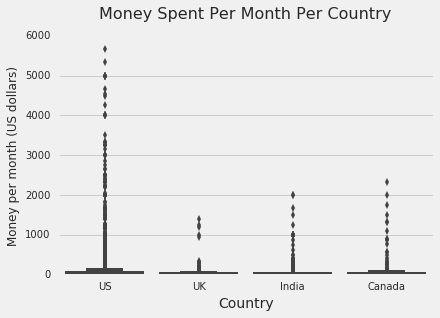

In [103]:
sns.boxplot(y='SpendPerMonth', x='CountryLive', data=only_4)
plt.title('Money Spent Per Month Per Country', fontsize=16, y=1.05)
plt.ylabel('Money per month (US dollars)', fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

## Choosing the two best markets

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay almost \$143 each month. Considering our monthly subscriptions are priced at \$59 per month, this is very reasonable for the market. 

Out of the last three countries, it seems that India and Canada are much better options as the monthly spend in the UK is only \$45. Seeing at this is already lower than the monthly subscription price for our product, it will be a tough market to penetrate with our current pricing model. 

Between India and Canada, we have a trade-off between the average monthly spend being almost \$30 higher in Canada, but double the potential customers from the survey. 

Due to the difficulty wit identifying the optimal market between India and Canada, we have three options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations.
2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally.
3. Advertise only in the US. 

The final decision between India and Canada will require further input from specific domain experts. 

## Next steps...

Here are a few potential next steps:

- Find other criteria for choosing the best market.
- Analyse other data sets:
    - [freeCodeCamp's 2016 New Coders Survey](https://github.com/freeCodeCamp/2016-new-coder-survey).
    - [Stack Overflow 2018 Developer Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey).